
# <span style="color:rgb(213,80,0)">Evalución de las capacidades de robot Scara</span>

**SAN JUAN FLORES CHRISTOPHER**


**Objetivo del proyecto**


Que el alumnos evalué y diseñe una tarea de seguimiento de una trayectoria.


**Hipótesis**


Es posible de evaluar las capacidades cinemáticas de un robot y determinar si este es capaz de realizar una tarea del seguimiento de una trayectoria simple.


**Objetivo**


Evaluar las capacidades cinemáticas de un robot mediante el índice de manipulabilidad y determinar las características cinemáticas, dinámicas y de potencia de los actuadores del robot.


**Metas**:

-  Proponer el lugar geométrico de una trayectoria que debe realizar el robot.
-  Evaluar las capacidades cinemáticas del robot de manera cualitativa mediante el índice de manipulabilidad.
-  Determinar la velocidad y el par que deben cubrir los motores.
-  Estimar la potencial mecánica requerida por cada motor y la potencial total requerida por el robot.
## Resumen

En la actualidad, entre las configuraciones más utilizadas para operaciones de ensamblaje y manipulación (*pick\-and\-place*) se encuentra el robot SCARA (*Selective Compliance Assembly Robot Arm*), el cual se caracteriza por tener rigidez en el eje vertical y complacencia en los ejes horizontales \[1\]. Para asegurar que un manipulador de este tipo pueda cumplir con los requerimientos de una tarea específica, como el seguimiento de una trayectoria, es indispensable realizar una evaluación exhaustiva de sus capacidades cinemáticas y dinámicas antes de su implementación física.


El estudio del movimiento del robot comienza con el análisis cinemático, que relaciona la posición y orientación del efector final con las variables articulares. Sin embargo, es necesario evaluar qué tan hábil es el mecanismo para moverse en dichas configuraciones. Para este fin, se propuso el concepto de "manipulabilidad", una medida cuantitativa derivada de la matriz Jacobiana que permite identificar las configuraciones singulares donde el robot pierde grados de libertad o requiere velocidades articulares infinitas para moverse \[2\]. Un índice de manipulabilidad alto indica que el robot posee una buena capacidad de transmisión de movimiento y fuerzas en una configuración dada, lo cual es crítico para la optimización de trayectorias \[3\].


Por otro lado, el diseño y selección de los actuadores requieren un análisis dinámico riguroso. Mientras que la cinemática describe el movimiento sin considerar las fuerzas, la dinámica estudia las relaciones entre las fuerzas, los pares y el movimiento del robot. Este análisis es esencial para calcular los requerimientos de potencia mecánica de los motores, asegurando que estos puedan vencer la inercia del sistema, las fuerzas centrípetas, de Coriolis y la gravedad durante la ejecución de la tarea \[4\].

## Definición de la tarea

El robot debe lleva su efector final de un punto a un punto


In [1]:
% Definicion de los puntos
% Pose inicial
x_in = 0.7;
y_in = 0.3;
theta_in = 0;
% Pose final
x_fin = 0.7;
y_fin = -0.3;
theta_fin = pi/2;

### Definición de la tarea en el espacio de las juntas

Para calcular la planeación de movimientos en el espacio de las juntas se requiere calcular la postura en punto inicial y en punto final.


In [2]:
% Cálculo de la solución de la primer postura

% Definición de los parámetros del robot
L1 = 0.5; % Longitud del primer eslabón
L2 = 0.5; % Longitud del segundo eslabón
L3 = 0.25; % Longitud del tercer eslabón

% Planteamiento de la solucion

x_3 = x_in - L3*cos(theta_in);
y_3 = y_in - L3*sin(theta_in);

% Solucion por le metodo geometrico

theta_2_in = acos((x_3^2+y_3^2-L1^2-L2^2)/(2*L1*L2));

beta = atan2(y_3,x_3);

psi = acos((x_3^2+y_3^2+L1^2-L2^2)/(2*L1*sqrt(x_3^2+y_3^2)));

theta_1_in = beta + psi;

% theta_1_in = beta - psi

theta_3_in = theta_in -theta_1_in - theta_2_in;

%%%
%% Solucion para el punto final

x_3 = x_fin - L3*cos(theta_fin);
y_3 = y_fin - L3*sin(theta_fin);

% Solucion por le metodo geometrico

theta_2_fin = acos((x_3^2+y_3^2-L1^2-L2^2)/(2*L1*L2));

beta = atan2(y_3,x_3);

psi = acos((x_3^2+y_3^2+L1^2-L2^2)/(2*L1*sqrt(x_3^2+y_3^2)));

theta_1_fin = beta + psi;

% theta_1_fin = beta - psi

theta_3_fin = theta_fin -theta_1_fin - theta_2_fin;



## Plateamiento de una trayectoria en el espacio de las juntas del robot

Definición de la trayectoria


Para este proyecto se propone la trayectoria de una funcion senoidal de amplitud  = 0.15


In [3]:
tf = 10;


for i=1:tf+1
    t = i; % Increment time for the next iteration
    theta_1_P(i) = theta_1_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(theta_1_fin-theta_1_in);
    theta_2_P(i) = theta_2_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(theta_2_fin-theta_2_in);
    theta_3_P(i) = theta_3_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(theta_3_fin-theta_3_in);

end



## Planeación de trayectoria en el espacio de trabajo del robot


In [4]:
% Cálculo de la solución de la primer postura

% Definición de los parámetros del robot
L1 = 0.5; % Longitud del primer eslabón
L2 = 0.5; % Longitud del segundo eslabón
L3 = 0.25; % Longitud del tercer eslabón

% x_in = 0.3;
% y_in = 0.3;
% theta_in = 0;

% x_fin = 0.3;
%y_fin = -0.3;
% theta_fin = pi/2;

tf = 10;
Amp = 0.15;

for i=1:tf+1
    t = i;
    x_P(i) = x_in + ((10/tf^3)*t^3 - (15/tf^4)*t^4 + (6/tf^5)*t^5)*(x_fin-x_in);
    y_P(i) = y_in + Amp * sin(2*pi * t / tf);
    theta_P(i) = theta_in;

    x_3_a(i) = x_P(i) - L3*cos(theta_P(i));
    y_3_a(i) = y_P(i) - L3*sin(theta_P(i));

    % Solucion por le metodo geometrico

    theta_2_tray(i) = acos((x_3_a(i)^2+y_3_a(i)^2-L1^2-L2^2)/(2*L1*L2));

    beta = atan2(y_3_a(i),x_3_a(i));

    psi = acos((x_3_a(i)^2+y_3_a(i)^2+L1^2-L2^2)/(2*L1*sqrt(x_3_a(i)^2+y_3_a(i)^2)));

    theta_1_tray(i) = beta + psi;

    % theta_1_in = beta - psi

    theta_3_tray(i) = theta_P(i) - theta_1_tray(i) - theta_2_tray(i);

end


In [5]:
tsim=0:1:tf

tsim = 1x11
     0     1     2     3     4     5     6     7     8     9    10


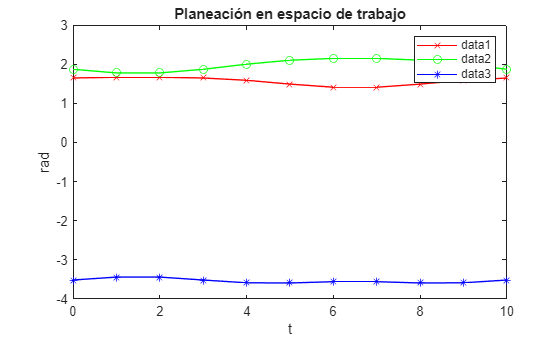

In [6]:
figure;

plot(tsim, theta_1_tray, 'r-x');
hold on;
plot(tsim, theta_2_tray, 'g-o');
plot(tsim, theta_3_tray, 'b-*');

hold off;

legend
title("Planeación en espacio de trabajo")
xlabel("t")
ylabel("rad")


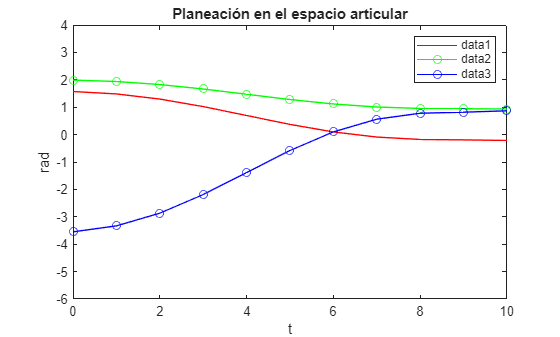

In [7]:


figure;

plot(tsim, theta_1_P, 'r-');
hold on;
plot(tsim, theta_2_P, 'g-o');
plot(tsim, theta_3_P, 'b-o');

hold off;

xlim([0.00 10.00])
ylim([-6.0 4.0])
legend
title("Planeación en el espacio articular")
xlabel("t")
ylabel("rad")

In [8]:

% w = L1*L2*sin(theta_2)

### Calculo de la cinemática de velocidades del robot

Cinemática de velocidades en espacio de las juntas




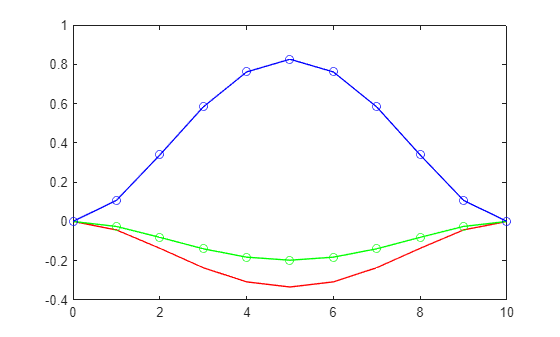

In [9]:
tf = 10;


for i=1:tf+1
    t = i-1; % Increment time for the next iteration
    theta_1_P_v(i) =  ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(theta_1_fin-theta_1_in);
    theta_2_P_v(i) = ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(theta_2_fin-theta_2_in);
    theta_3_P_v(i) =  ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(theta_3_fin-theta_3_in);

end

figure;

plot(tsim, theta_1_P_v, 'r-');
hold on;
plot(tsim, theta_2_P_v, 'g-o');
plot(tsim, theta_3_P_v, 'b-o');

hold off;


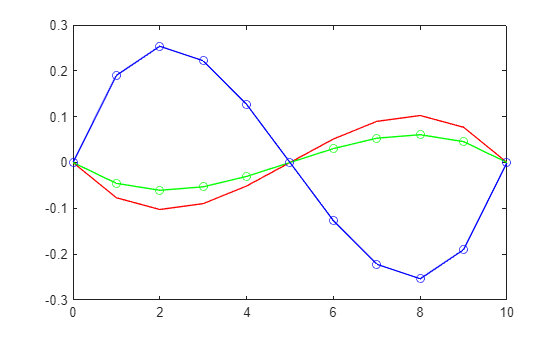

In [10]:
tf = 10;

for i=1:tf+1
    t = i-1; % Increment time for the next iteration
    theta_1_P_a(i) =  ((60/tf^3)*t - (180/tf^4)*t^2 + (120/tf^5)*t^3)*(theta_1_fin-theta_1_in);
    theta_2_P_a(i) = ((60/tf^3)*t - (180/tf^4)*t^2 + (120/tf^5)*t^3)*(theta_2_fin-theta_2_in);
    theta_3_P_a(i) =  ((60/tf^3)*t - (180/tf^4)*t^2 + (120/tf^5)*t^3)*(theta_3_fin-theta_3_in);

end

figure;

plot(tsim, theta_1_P_a, 'r-');
hold on;
plot(tsim, theta_2_P_a, 'g-o');
plot(tsim, theta_3_P_a, 'b-o');

hold off;


Cinemática de velocidades en espacio de trabajo




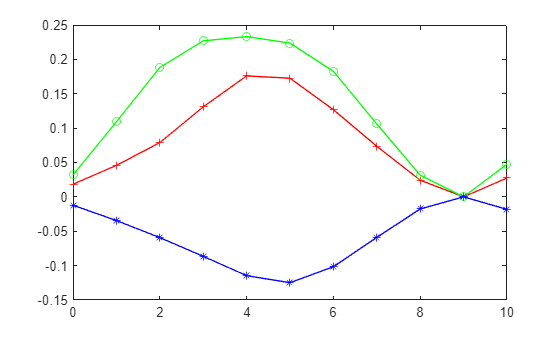

In [11]:
% Cálculo de la solución de la primer postura

% Definición de los parámetros del robot
L_1 = 0.5; % Longitud del primer eslabón
L_2 = 0.5; % Longitud del segundo eslabón
L_3 = 0.25; % Longitud del tercer eslabón

% x_in = 0.3;
% y_in = 0.3;
% theta_in = 0;

% x_fin = 0.3;
% y_fin = -0.3;
%theta_fin = pi/2;

tf = 10;
for i=1:tf+1
    t = i;
    x_P_v(i) = ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(x_fin-x_in);
    y_P_v(i) = ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(y_fin-y_in);
    theta_P_v(i) = ((30/tf^3)*t^2 - (60/tf^4)*t^3 + (30/tf^5)*t^4)*(theta_fin-theta_in);

    x_dot = x_P_v(i);
    y_dot = y_P_v(i);
    theta_dot_P = theta_P_v(i);

    theta_O_1 = theta_1_tray(i);
    theta_1_2 = theta_2_tray(i);
    theta_2_3 = theta_3_tray(i);

    theta_1_v(i) = (x_dot*cos(theta_1_2 + theta_O_1))/(L_1*sin(theta_1_2)) + (y_dot*sin(theta_1_2 + theta_O_1))/(L_1*sin(theta_1_2)) + (L_3*theta_dot_P*sin(theta_2_3))/(L_1*sin(theta_1_2));
    theta_2_v(i) = - (x_dot*(L_2*cos(theta_1_2 + theta_O_1) + L_1*cos(theta_O_1)))/(L_1*L_2*sin(theta_1_2)) - (y_dot*(L_2*sin(theta_1_2 + theta_O_1) + L_1*sin(theta_O_1)))/(L_1*L_2*sin(theta_1_2)) - (L_3*theta_dot_P*(L_1*sin(theta_1_2 + theta_2_3) + L_2*sin(theta_2_3)))/(L_1*L_2*sin(theta_1_2));
    theta_3_v(i) = (theta_dot_P*(L_3*sin(theta_1_2 + theta_2_3) + L_2*sin(theta_1_2)))/(L_2*sin(theta_1_2)) + (x_dot*cos(theta_O_1))/(L_2*sin(theta_1_2)) + (y_dot*sin(theta_O_1))/(L_2*sin(theta_1_2));


end

figure;

plot(tsim, theta_1_v, 'r-+');
hold on;
plot(tsim, theta_2_v, 'g-o');
plot(tsim, theta_3_v, 'b-*');

hold off;


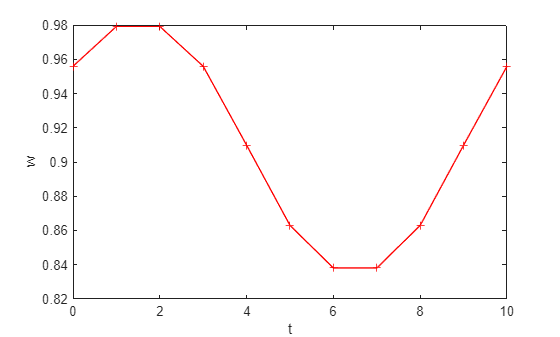

In [12]:
for i=1:tf+1

    w(i) = L_1*L_2*sin(theta_2_tray(i))/(L1*L_2);

end

figure;
plot(tsim, w , 'r-+');

xlabel("t")
ylabel("w")

xlabel("t")
ylabel("w")

## Evalaución de la capacidad del robot
 $ $ \begin{array}{l} \left(\begin{array}{c} {\ddot{\theta} }_{O,1} \,{\left(\frac{\cos \left(\theta_{1,2} \right)}{4}+\frac{{\sigma_{12} }^2 }{2}+\frac{{\sigma_{14} }^2 }{2}+\frac{27}{8}\right)}-{\dot{\theta} }_{2,3} \,{\left(\frac{\sigma_{18} \,\sigma_{10} }{16}-\frac{\sigma_{16} \,\sigma_{11} }{16}+\frac{\sigma_{12} \,\sigma_4 }{2}-\frac{\sigma_5 \,\sigma_{14} }{2}\right)}+{\ddot{\theta} }_{1,2} \,\sigma_3 +{\ddot{\theta} }_{2,3} \,\sigma_6 -{\dot{\theta} }_{1,2} \,{\left(\sigma_8 -\frac{\sigma_{14} \,\sigma_2 }{2}+\frac{\sigma_1 \,\sigma_{12} }{2}-\sigma_9 +\frac{{\dot{\theta} }_{1,2} \,\sin \left(\theta_{1,2} \right)}{8}+\frac{{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)}{4}\right)}\newline \frac{{{\dot{\theta} }_{O,1} }^2 \,\sin \left(\theta_{1,2} \right)}{8}-{\dot{\theta} }_{2,3} \,{\left(\frac{\sigma_{18} \,\sigma_{10} }{16}-\frac{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\,\sigma_5 }{2}+\frac{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\,\sigma_4 }{2}-\frac{\sigma_{16} \,\sigma_{11} }{16}\right)}+{\ddot{\theta} }_{2,3} \,\sigma_7 +\frac{\sigma_{10} \,\sigma_1 }{2}+{\ddot{\theta} }_{O,1} \,\sigma_3 -\frac{\sigma_{11} \,\sigma_2 }{2}+{\ddot{\theta} }_{1,2} \,{\left(\frac{{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}}^2 }{2}+\frac{{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}}^2 }{2}+\frac{33}{16}\right)}-{\dot{\theta} }_{1,2} \,{\left(\frac{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\,\sigma_1 }{2}-\frac{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\,\sigma_2 }{2}+\sigma_8 -\sigma_9 +\frac{{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)}{8}\right)}+\frac{{\dot{\theta} }_{1,2} \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)}{8}\newline {\ddot{\theta} }_{2,3} \,{\left(\frac{{\sigma_{16} }^2 }{128}+\frac{{\sigma_{18} }^2 }{128}+1\right)}-\frac{\sigma_5 \,\sigma_{11} }{2}+{\ddot{\theta} }_{1,2} \,\sigma_7 -{\dot{\theta} }_{2,3} \,{\left(\frac{\sigma_{18} \,\sigma_{10} }{16}-\frac{\sigma_{18} \,\sigma_5 }{16}-\frac{\sigma_{16} \,\sigma_{11} }{16}+\frac{\sigma_{16} \,\sigma_4 }{16}\right)}+{\dot{\theta} }_{1,2} \,{\left(\frac{\sigma_{18} \,\sigma_2 }{16}-\frac{\sigma_{18} \,\sigma_{10} }{16}-\frac{\sigma_{16} \,\sigma_1 }{16}+\frac{\sigma_{16} \,\sigma_{11} }{16}\right)}+{\ddot{\theta} }_{O,1} \,\sigma_6 +\frac{\sigma_{10} \,\sigma_4 }{2} \end{array}\right)\\
\mathrm{}\\
\textrm{where}\\
\mathrm{}\\
\;\;\sigma_1 =\frac{{\dot{\theta} }_{2,3} \,\sigma_{18} }{8}+\sigma_{15} +{\dot{\theta} }_{O,1} \,{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\\
\mathrm{}\\
\;\;\sigma_2 =\sigma_{13} +{\dot{\theta} }_{O,1} \,{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}+\frac{{\dot{\theta} }_{2,3} \,\sigma_{16} }{8}\\
\mathrm{}\\
\;\;\sigma_3 =\frac{\cos \left(\theta_{1,2} \right)}{8}+\frac{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\,\sigma_{12} }{2}+\frac{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\,\sigma_{14} }{2}+\frac{33}{16}\\
\mathrm{}\\
\;\;\sigma_4 =\frac{{\dot{\theta} }_{1,2} \,\sigma_{18} }{8}+\frac{{\dot{\theta} }_{2,3} \,\sigma_{18} }{8}+\frac{{\dot{\theta} }_{O,1} \,\sigma_{18} }{8}\\
\mathrm{}\\
\;\;\sigma_5 =\frac{{\dot{\theta} }_{1,2} \,\sigma_{16} }{8}+\frac{{\dot{\theta} }_{2,3} \,\sigma_{16} }{8}+\frac{{\dot{\theta} }_{O,1} \,\sigma_{16} }{8}\\
\mathrm{}\\
\;\;\sigma_6 =\frac{\sigma_{16} \,\sigma_{12} }{16}+\frac{\sigma_{18} \,\sigma_{14} }{16}+1\\
\mathrm{}\\
\;\;\sigma_7 =\frac{\sigma_{16} \,{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}}{16}+\frac{\sigma_{18} \,{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}}{16}+1\\
\mathrm{}\\
\;\;\sigma_8 =\frac{{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\,\sigma_{10} }{2}\\
\mathrm{}\\
\;\;\sigma_9 =\frac{{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\,\sigma_{11} }{2}\\
\mathrm{}\\
\;\;\sigma_{10} =\sigma_{13} +\frac{{\dot{\theta} }_{2,3} \,\sigma_{16} }{8}+{\dot{\theta} }_{O,1} \,\sigma_{12} \\
\mathrm{}\\
\;\;\sigma_{11} =\frac{{\dot{\theta} }_{2,3} \,\sigma_{18} }{8}+{\dot{\theta} }_{O,1} \,\sigma_{14} +\sigma_{15} \\
\mathrm{}\\
\;\;\sigma_{12} =\frac{\sigma_{16} }{8}+\sigma_{17} +\frac{\cos \left(\theta_{O,1} \right)}{2}\\
\mathrm{}\\
\;\;\sigma_{13} ={\dot{\theta} }_{1,2} \,{\left(\frac{\sigma_{16} }{8}+\sigma_{17} \right)}\\
\mathrm{}\\
\;\;\sigma_{14} =\frac{\sigma_{18} }{8}+\sigma_{19} +\frac{\sin \left(\theta_{O,1} \right)}{2}\\
\mathrm{}\\
\;\;\sigma_{15} ={\dot{\theta} }_{1,2} \,{\left(\frac{\sigma_{18} }{8}+\sigma_{19} \right)}\\
\mathrm{}\\
\;\;\sigma_{16} =\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\\
\mathrm{}\\
\;\;\sigma_{17} =\frac{\cos \left(\theta_{1,2} +\theta_{O,1} \right)}{2}\\
\mathrm{}\\
\;\;\sigma_{18} =\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\\
\mathrm{}\\
\;\;\sigma_{19} =\frac{\sin \left(\theta_{1,2} +\theta_{O,1} \right)}{2}
\end{array} $ $


Cálculo de los pares del robot



In [13]:

for i=1:tf+1

    theta_1 = theta_1_tray(i);
    theta_2 = theta_2_tray(i);
    theta_3 = theta_3_tray(i);

    theta_1_vc = theta_1_P_v(i);
    theta_2_vc = theta_2_P_v(i);
    theta_3_vc = theta_3_P_v(i);

    theta_1_a = theta_1_P_a(i);
    theta_2_a = theta_2_P_a(i);
    theta_3_a = theta_3_P_a(i);

    sigma_19 = sin(theta_2+theta_1)/2;
    sigma_18 = sin(theta_1+theta_2+theta_3);
    sigma_17 = cos(theta_2+theta_1)/2;
    sigma_16 = cos(theta_1+theta_2+theta_3);

    sigma_15 = theta_2_vc*(sigma_18/8 + sigma_19);
    sigma_14 = sigma_18/8 + sigma_19 + sin(theta_1)/2;
    sigma_13 = theta_2_vc *(sigma_16/8 +sigma_17);
    sigma_12 = sigma_16/8 +sigma_17 +cos(theta_1)/2;
    sigma_11 = theta_3_vc*sigma_18/8 + theta_1_vc*sigma_14 +sigma_15;
    sigma_10 = sigma_13 + theta_3_vc*sigma_16/8 +theta_1_vc*sigma_12;
    sigma_9 = ((sigma_16/8 + sigma_17)*sigma_11)/2;
    sigma_8 = ((sigma_18/8 + sigma_19)*sigma_10)/2;
    sigma_7 = (sigma_16*(sigma_16/8 + sigma_17))/16 + (sigma_18*(sigma_18/8 + sigma_19))/16 + 1;
    sigma_6 = sigma_16*sigma_12/16 + sigma_18*sigma_14 + 1;
    sigma_5 = theta_2_vc*sigma_16/8 + theta_3_vc*sigma_16/8 + theta_1_vc*sigma_16/8;
    sigma_4 = theta_2_vc*sigma_18/8 + theta_3_vc*sigma_18/8 + theta_1_vc*sigma_18/8;
    sigma_3 = cos(theta_2)/8 + ((sigma_16/8 + sigma_17)*sigma_12)/2 + ((sigma_18/8 + sigma_19)*sigma_14)/2 + 33/16;
    sigma_2 = sigma_13 +theta_1_vc*(sigma_16/8 + sigma_17) + theta_3_vc*sigma_16/8;
    sigma_1 = theta_3_vc*sigma_18/8 + sigma_15 +theta_1_vc*(sigma_18/8 + sigma_19);

    tao_1_c(i) = theta_1_a*(cos(theta_2)/4 + sigma_12^2/2 + sigma_14^2/2 + 27/8) - theta_3_vc* (sigma_18*sigma_10/16 - sigma_16*sigma_11/16 + sigma_12*sigma_4/2 - sigma_5*sigma_14/2) + theta_2_a*sigma_3 + theta_3_a*sigma_6 - theta_2_vc*(sigma_8 - sigma_14*sigma_2/2 + sigma_1*sigma_12/2 - sigma_9 + theta_2_vc*sin(theta_2)/8 + theta_1_vc*sin(theta_2)/4);
    tao_2_c(i) = theta_1_vc^2*sin(theta_2)/8 - theta_3_vc*(sigma_18*sigma_10 - ((sigma_18/8 + sigma_19)*sigma_5)/2 + ((sigma_16/8 + sigma_17)*sigma_4)/2 - sigma_16*sigma_11/16) + theta_2_a*sigma_7 + sigma_10*sigma_1/2 + theta_1_a*sigma_3 - sigma_11*sigma_2/2 + theta_2_a*(((sigma_16 + sigma_17)^2)/2 + ((sigma_18 + sigma_19)^2)/2 + 33/16) - theta_2_vc*((sigma_16/8 + sigma_17)*sigma_1/2 + (sigma_18/8 + sigma_19)*sigma_2/2 + sigma_8 - sigma_9 + theta_1_vc*sin(theta_2)/8) + theta_2_vc*theta_1_vc*sin(theta_2)/8;
    tao_3_c(i) = theta_3_a*(sigma_16^2/128 + sigma_18^2/128 + 1 ) - sigma_5*sigma_11/2 + theta_2_a*sigma_7 - theta_3_vc*(sigma_18*sigma_10/16 - sigma_18*sigma_5/16 - sigma_16*sigma_11/16 + sigma_16*sigma_4/16) + theta_2_vc*(sigma_18*sigma_2/16 - sigma_18*sigma_10/16 - sigma_16*sigma_1/16 + sigma_16*sigma_11/16) + theta_1_a*sigma_6 + sigma_10*sigma_4/2;

    pot_1(i) = abs(tao_1_c(i)*theta_1_vc);
    pot_2(i) = abs(tao_2_c(i)*theta_2_vc);
    pot_3(i) = abs(tao_3_c(i)*theta_3_vc);
    pot_total(i) = pot_1(i) + pot_2(i) + pot_3(i);


end



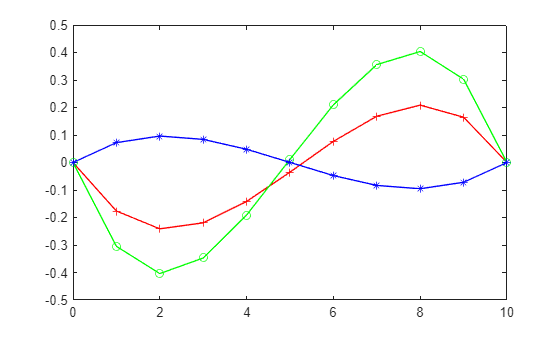

In [14]:
figure;
plot(tsim, tao_1_c, 'r-+');
hold on;
plot(tsim, tao_2_c, 'g-o');
plot(tsim, tao_3_c, 'b-*');
hold off;


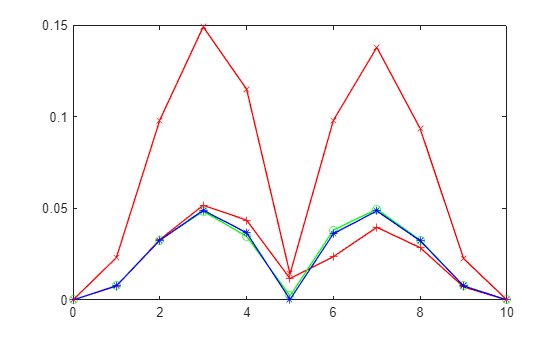

In [15]:

figure;
plot(tsim, pot_1, 'r-+');
hold on;
plot(tsim, pot_2, 'g-o');
plot(tsim, pot_3, 'b-*');
plot(tsim, pot_total, 'r-x');
hold off;

### **Conclusiones**

Mediante modelos matemáticos y simulación se logró diseñar una tarea de seguimiento de trayectoria senoidal y, a partir de ella, determinar los requerimientos cinemáticos y dinámicos del sistema. El modelo implementado demostró ser util para predecir el comportamiento del robot, permitiendo identificar las velocidades, pares y potencias necesarias para cumplir con la tarea en el tiempo establecido de 10 segundos


La evaluación del índice de manipulabilidad logró resultados altamente satisfactorios. Dado que la trayectoria propuesta se ubica en una zona media del espacio de trabajo, el ángulo del codo se mantuvo cercano a los 0.15 rad durante gran parte del recorrido. Esto permite concluir que la ubicación seleccionada para la tarea es óptima, ya que el robot opera lejos de las singularidades cinemáticas (brazo totalmente estirado o doblado), garantizando una alta capacidad de transmisión de velocidad y precisión en el movimiento.


Pares: Se observó que los pares requeridos no son constantes, sino oscilatorios, respondiendo a las aceleraciones cambiantes necesarias para trazar las curvas de la función seno. El actuador de la base experimentó las mayores cargas debido a que debe soportar la inercia variable de todo el brazo manipulador.


Potencia Mecánica: La estimación de la potencia total mostró picos que coinciden con los momentos de máxima velocidad tangencial en la curva. Este dato es crítico para el dimensionamiento de los motores; se concluye que seleccionar actuadores basándose solo en el par promedio sería insuficiente, siendo necesario considerar estos picos de potencia dinámica para evitar la saturación o el sobrecalentamiento en un ciclo de trabajo real.

### Referencias

\[1\] M. W. Spong, S. Hutchinson y M. Vidyasagar, *Robot Modeling and Control*, 2ª ed. Hoboken, NJ: Wiley, 2020.


\[2\] T. Yoshikawa, "Manipulability of robotic mechanisms," *The International Journal of Robotics Research*, vol. 4, no. 2, pp. 3\-9, 1985.


\[3\] B. Siciliano, L. Sciavicco, L. Villani y G. Oriolo, *Robotics: Modelling, Planning and Control*. Londres: Springer\-Verlag, 2009.


\[4\] J. J. Craig, *Introduction to Robotics: Mechanics and Control*, 4ª ed. Upper Saddle River, NJ: Pearson Education, 2018.

